Sentiment analysis
------------------

Ce programme est un test de Sentiment Analysis, qui sera utilisé pour analyser des tweets par la suite.

Copyright © Romain DODET 2022

In [79]:
# NLTK toolkit for sentiment analysis
# https://www.nltk.org/howto/sentiment.html
# https://www.nltk.org/_modules/nltk/sentiment/vader.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string
from nltk.sentiment import SentimentAnalyzer

from sklearn.metrics import accuracy_score

In [61]:
# Load data from a text corpus and convert to a pandas dataframe
# https://www.nltk.org/_modules/nltk/corpus/reader/plaintext.html

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('subjectivity')
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package subjectivity to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
# Load data from a text corpus and convert to a pandas dataframe

data = nltk.corpus.movie_reviews
print(data.categories())

['neg', 'pos']


In [63]:
# Convert the reviews to a pandas dataframe

df = pd.DataFrame(data.fileids(), columns=['file'], dtype=str)
print(df.head())

                  file
0  neg/cv000_29416.txt
1  neg/cv001_19502.txt
2  neg/cv002_17424.txt
3  neg/cv003_12683.txt
4  neg/cv004_12641.txt


In [64]:
print(data.raw(fileids=df['file'][0]))

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [65]:
# Add sentiment column to the dataframe
df['sentiment'] = df['file'].apply(lambda x: x.split('/')[0]).astype(str)

# Add text column to the dataframe
df['text'] = df['file'].apply(lambda x: data.raw(x)).astype(str)

In [66]:
df.head()

,file,sentiment,text
0,neg/cv000_29416.txt,neg,"plot : two teen couples go to a church party ,..."
1,neg/cv001_19502.txt,neg,the happy bastard's quick movie review \ndamn ...
2,neg/cv002_17424.txt,neg,it is movies like these that make a jaded movi...
3,neg/cv003_12683.txt,neg,""" quest for camelot "" is warner bros . ' firs..."
4,neg/cv004_12641.txt,neg,synopsis : a mentally unstable man undergoing ...


In [67]:
# size of the dataframe in octets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file       2000 non-null   object
 1   sentiment  2000 non-null   object
 2   text       2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [68]:
# Clean the text column by removing punctuation, stopwords, and newlines

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    text = text.lower()
    text = text.split()
    text = [w for w in text if not w in stop_words]
    text = [lemmatizer.lemmatize(w) for w in text]
    text = [stemmer.stem(w) for w in text]
    text = ' '.join(text)
    return text

In [69]:
# Example of cleaning the text column

text = clean_text(df['text'][0])
print(text)

plot two teen coupl go church parti drink drive get accid one guy dy girlfriend continu see life nightmar what deal watch movi sorta find critiqu mindfuck movi teen gener touch cool idea present bad packag make review even harder one write sinc gener applaud film attempt break mold mess head lost highway memento good bad way make type film folk didnt snag one correctli seem taken pretti neat concept execut terribl problem movi well main problem simpli jumbl start normal downshift fantasi world audienc member idea what go dream charact come back dead other look like dead strang apparit disappear looooot chase scene ton weird thing happen simpli explain person dont mind tri unravel film everi give clue get kind fed film biggest problem obvious got big secret hide seem want hide complet final five minut make thing entertain thrill even engag meantim realli sad part arrow dig flick like actual figur halfway point strang start make littl bit sens still didnt make film entertain guess bottom

In [70]:
df['text'] = df['text'].apply(lambda x: clean_text(x))
print(df.head())

                  file sentiment  \
0  neg/cv000_29416.txt       neg   
1  neg/cv001_19502.txt       neg   
2  neg/cv002_17424.txt       neg   
3  neg/cv003_12683.txt       neg   
4  neg/cv004_12641.txt       neg   

                                                text  
0  plot two teen coupl go church parti drink driv...  
1  happi bastard quick movi review damn yk bug go...  
2  movi like make jade movi viewer thank invent t...  
3  quest camelot warner bro first featurelength f...  
4  synopsi mental unstabl man undergo psychothera...  


In [71]:
# Create a new column with vectorized text

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
df['vectorized_text'] = pd.Series(X.toarray().tolist())

print(df.head())

                  file sentiment  \
0  neg/cv000_29416.txt       neg   
1  neg/cv001_19502.txt       neg   
2  neg/cv002_17424.txt       neg   
3  neg/cv003_12683.txt       neg   
4  neg/cv004_12641.txt       neg   

                                                text  \
0  plot two teen coupl go church parti drink driv...   
1  happi bastard quick movi review damn yk bug go...   
2  movi like make jade movi viewer thank invent t...   
3  quest camelot warner bro first featurelength f...   
4  synopsi mental unstabl man undergo psychothera...   

                                     vectorized_text  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


In [72]:
# Create a new column with the sentiment score

sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['text'].apply(lambda x: sid.polarity_scores(x))
print(df.head())

                  file sentiment  \
0  neg/cv000_29416.txt       neg   
1  neg/cv001_19502.txt       neg   
2  neg/cv002_17424.txt       neg   
3  neg/cv003_12683.txt       neg   
4  neg/cv004_12641.txt       neg   

                                                text  \
0  plot two teen coupl go church parti drink driv...   
1  happi bastard quick movi review damn yk bug go...   
2  movi like make jade movi viewer thank invent t...   
3  quest camelot warner bro first featurelength f...   
4  synopsi mental unstabl man undergo psychothera...   

                                     vectorized_text  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                     sentiment_score  
0  {'neg': 0.121, 'neu': 0.748, 'pos': 0.13, 'com...  

In [73]:
# Create a new column with the sentiment category

def sentiment_category(score):
    if score['compound'] >= 0.:
        return 'pos'
    else:
        return 'neg'

In [74]:
df['sentiment_category'] = df['sentiment_score'].apply(lambda x: sentiment_category(x))

In [75]:
print(df['sentiment_category'].value_counts())
print(df[['sentiment_category', 'sentiment']])

pos    1378
neg     622
Name: sentiment_category, dtype: int64
     sentiment_category sentiment
0                   neg       neg
1                   pos       neg
2                   pos       neg
3                   neg       neg
4                   neg       neg
...                 ...       ...
1995                pos       pos
1996                neg       pos
1997                neg       pos
1998                pos       pos
1999                pos       pos

[2000 rows x 2 columns]


In [80]:
# Accuracy of the sentiment analysis

print("Accuracy score", accuracy_score(df['sentiment'], df['sentiment_category']))

0.601


In [100]:
# Low accuracy of the sentiment analysis
# --> Need to improve the cleaning of the text column
# keep only the words that have a strong sentiment score

def keep_strong_words(text, n_words=30):
    text = text.split()
    score_per_word = [np.abs(sid.polarity_scores(w)['compound']) for w in text]
    best_words = np.argsort(score_per_word)[-n_words:]
    text = [text[i] for i in best_words]
    text = ' '.join(text)
    return text



In [101]:
[keep_strong_words(df['text'][i], 30) for i in range(1, 10)]

['know dont substanc flash go movi power empti movi still littl know power feel go gore within action sequenc viru bring well like like like like like damn good bastard',
 'cut avoid cool cool cool play like like thank like like like mess clear clear suspicion rash nice progress nice nice cute wrong hand care save stolen wisdom hero best',
 'dream bore share loss lack fan mess enthusiast mess like thrill stink error lose dull blind help talent nice good interest accident steal steal tgif danger win best dead evil',
 'okay bore victim victim play like credit credit suspicion reject doom reject favor special good respect woo heroin save strong gain danger bad fatal bad love dead murder kill murder',
 'like like fit fight fight fight shock fight haunt talent kiss easier better better good good better terror sucker bad horror horror horror horror assault assault assault assault great murder',
 'play like like like like threaten shock condemn credit special lose good safe better interest si

In [105]:
df["redacted_text"] = df["text"].apply(lambda x: keep_strong_words(x, 40))
df["redacted_text"].head()

0    dont charact want weird hide hide disappear ok...
1    kick ship back origin know dont nowher middl r...
2    hour invent polic matter number number hard mi...
3    chanc jessalyn warlord footstep arthur get str...
4    stori screen throughout shown snapshot strain ...
Name: redacted_text, dtype: object

In [106]:
# Now let's try again with the redacted text

df['redacted_sentiment_score'] = df['redacted_text'].apply(lambda x: sid.polarity_scores(x))
df['redacted_sentiment_category'] = df['redacted_sentiment_score'].apply(lambda x: sentiment_category(x))

print("Accuracy score: ", accuracy_score(df['sentiment'], df['redacted_sentiment_category']))

Accuracy score:  0.5965


In [111]:
# Let's use a GRU to classify the sentiment

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df["output"] = df["sentiment"].apply(lambda x: 1 if x == "pos" else 0)
df["output"].head()

X_train, X_test, y_train, y_test = train_test_split(df["text"], df["output"], test_size=0.2, random_state=42)

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_features = 20000
maxlen = 100
embedding_size = 128

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test = pad_sequences(list_tokenized_test, maxlen=maxlen)

print(X_train.shape, X_test.shape)

(1600, 100) (400, 100)


In [112]:
# Build the model

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional, Dropout

model = Sequential()
model.add(Embedding(max_features, embedding_size))
model.add(Bidirectional(GRU(32, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(32)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         31104     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [113]:
# Train the model

batch_size = 32
epochs = 10

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
50/50 [==============================] - 12s 105ms/step - loss: 0.6921 - accuracy: 0.5163 - val_loss: 0.6867 - val_accuracy: 0.5975
Epoch 2/10
50/50 [==============================] - 4s 79ms/step - loss: 0.4977 - accuracy: 0.8581 - val_loss: 0.6046 - val_accuracy: 0.7100
Epoch 3/10
50/50 [==============================] - 4s 80ms/step - loss: 0.0608 - accuracy: 0.9831 - val_loss: 0.6750 - val_accuracy: 0.7225
Epoch 4/10
50/50 [==============================] - 4s 80ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.8446 - val_accuracy: 0.7400
Epoch 5/10
50/50 [==============================] - 4s 80ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8060 - val_accuracy: 0.7500
Epoch 6/10
50/50 [==============================] - 4s 82ms/step - loss: 6.2979e-04 - accuracy: 1.0000 - val_loss: 0.8412 - val_accuracy: 0.7500
Epoch 7/10
50/50 [==============================] - 4s 82ms/step - loss: 4.1614e-04 - accuracy: 1.0000 - val_loss: 0.8742 - val_accuracy: 0.7525
Epo

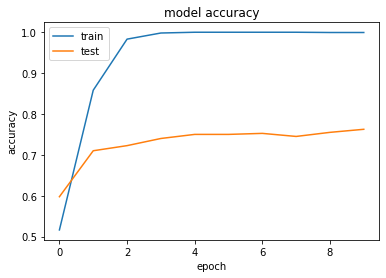

In [115]:
# Plot the accuracy and loss

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

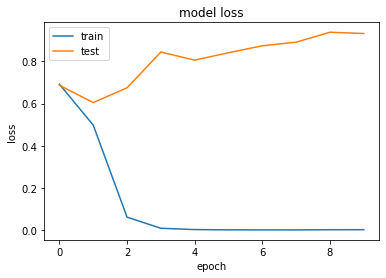

In [116]:
# Plot the loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

13/13 [==============================] - 1s 36ms/step


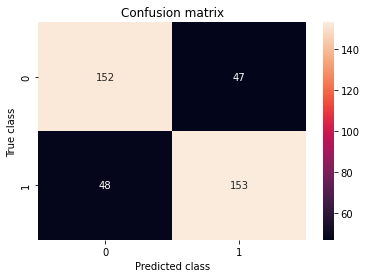

In [119]:
# Show the confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

1/1 [==============================] - 0s 82ms/step


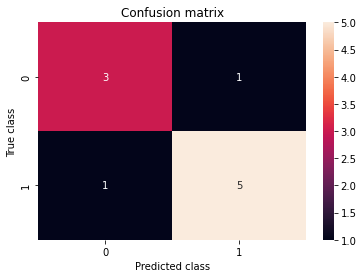

0.8

In [124]:
# Test the model with a new review from IMDB

list_good_reviews = [
    "This movie was awesome! The acting was great, plot was wonderful, and there were pythons...so yea!",
    "I really liked this movie because the story was so good. The characters were likable and the dialog was great.",
    "I thought the movie was going to be bad but it was actually one of the best movies I've ever watched.",
    "This movie is amazing because the ending was so great and it had so much action.",
    "This movie was so awesome! The ending was great, it had amazing effects, and the story was wonderful.",
    "This movie was great! I really liked the story and the ending was amazing. Also the action was great.",
]

list_bad_reviews = [
    "This movie sucked. I slept through it. The acting was terrible and I want my money back.",
    "This movie was bad. The story was terrible and the characters were unlikable. I wouldn't recommend it.",
    "Wow! This was so bad. I couldn't believe how bad the acting was. I wouldn't recommend this movie.",
    "I couldn't believe how bad the acting was. I wouldn't recommend this movie, even to my worst enemy.",
]

new_reviews = list_good_reviews + list_bad_reviews

y_test = [1] * len(list_good_reviews) + [0] * len(list_bad_reviews)

new_reviews = tokenizer.texts_to_sequences(new_reviews)
new_reviews = pad_sequences(new_reviews, maxlen=maxlen)

y_pred = model.predict(new_reviews)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

accuracy_score(y_test, y_pred)